In [ ]:
# libraries importation and initial exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# construir modelo con train.csv
# una vez hecho
    # modelo predict test
    # label 'survived'

In [ ]:
file_path = '/content/train.csv' # csv importation
df_original = pd.read_csv(file_path, delimiter=',')
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df_original.copy() # copying the dataframe

In [ ]:
df.info() # dataframe general info exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
null_values = df.isnull().sum() # representing null values as percentages

n_records = len(df)
pct_nulls = (null_values / n_records) * 100
pct_nulls

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S


In [ ]:
 # renaming dataframe columns snake_case style

df = df.rename(columns={
    'PassengerId': 'passenger_id',
    'Survived': 'survived',
    'Pclass': 'pclass',
    'Name': 'name',
    'Sex': 'gender',
    'Age': 'age',
    'SibSp': 'sibsp',
    'Parch': 'parch',
    'Ticket': 'ticket',
    'Fare': 'fare',
    'Cabin': 'cabin',
    'Embarked': 'embarked'
    })

In [ ]:
df.head()

,passenger_id,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# dropping irrelevant columns for training the model

columns_to_drop = ['passenger_id',
                   'name',
                   'ticket',
                   'cabin',
                   ]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['pclass'].unique() # exploring values of 'pclass' column

array([3, 1, 2])

In [ ]:
df = pd.get_dummies(data=df, columns=['pclass'], drop_first=True, dtype='bool') # applying OHE on 'pclass' column

df.sample(7)

,survived,gender,age,sibsp,parch,fare,embarked,pclass_2,pclass_3
516,1,female,34.0,0,0,10.5000,S,True,False
855,1,female,18.0,0,1,9.3500,S,False,True
158,0,male,NaN,0,0,8.6625,S,False,True
403,0,male,28.0,1,0,15.8500,S,False,True
227,0,male,20.5,0,0,7.2500,S,False,True
690,1,male,31.0,1,0,57.0000,S,False,False
766,0,male,NaN,0,0,39.6000,C,False,False


In [ ]:
df = pd.get_dummies(data=df, columns=['gender'], drop_first=True, dtype='bool') # applying OHE on 'gender' column

df.sample(7)

,survived,age,sibsp,parch,fare,embarked,pclass_2,pclass_3,gender_male
62,0,45.0,1,0,83.4750,S,False,False,True
125,1,12.0,1,0,11.2417,C,False,True,True
176,0,NaN,3,1,25.4667,S,False,True,True
779,1,43.0,0,1,211.3375,S,False,False,False
811,0,39.0,0,0,24.1500,S,False,True,True
603,0,44.0,0,0,8.0500,S,False,True,True
132,0,47.0,1,0,14.5000,S,False,True,False


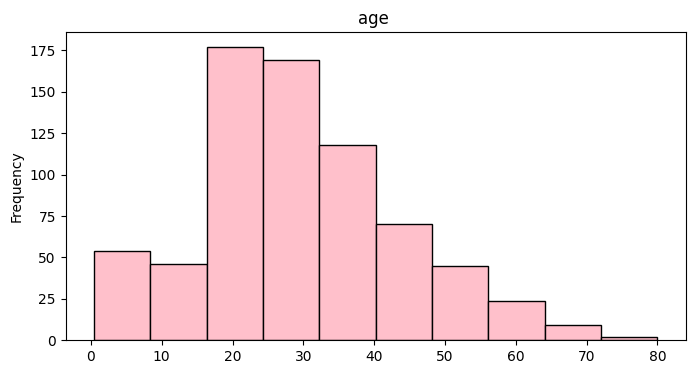

In [ ]:
df['age'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='age '); # visualizing if there's any outlier in age column

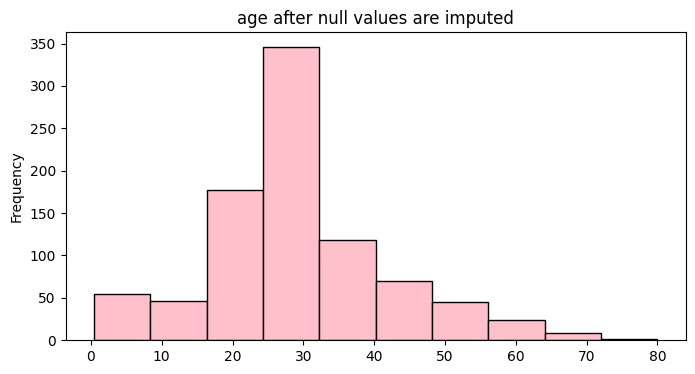

In [ ]:
age_mean = df['age'].mean() # Imputation of null values of 'age' column
df['age'] = df['age'].fillna(age_mean)
df['age'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='age after null values are imputed');

In [ ]:
# Applying min max scaler in 'age' column to scale

max_age = df['age'].max()
min_age = df['age'].min()


df['age_scaled'] = (df['age'] - min_age) / (max_age - min_age)

df = df.drop(columns='age')

In [ ]:
df.head()

,survived,sibsp,parch,fare,embarked,pclass_2,pclass_3,gender_male,age_scaled
0,0,1,0,7.2500,S,False,True,True,0.271174
1,1,1,0,71.2833,C,False,False,False,0.472229
2,1,0,0,7.9250,S,False,True,False,0.321438
3,1,1,0,53.1000,S,False,False,False,0.434531
4,0,0,0,8.0500,S,False,True,True,0.434531


In [ ]:
df['sibsp'].unique() # exploring values of 'sibsp' column

array([1, 0, 3, 4, 2, 5, 8])

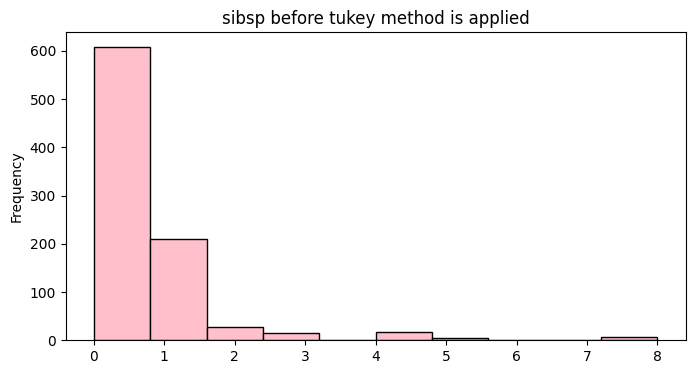

In [ ]:
df['sibsp'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='sibsp before tukey method is applied'); # visualizing if there's any outlier in sibsp column

In [ ]:
# quantile calculation of 'sibsp' column
q1 = df['sibsp'].quantile(0.25)
q3 = df['sibsp'].quantile(0.75)

# Interquartile range calculation
iqr = q3 - q1
iqr

# minimum and maximum definition
tukey_min = q1 - 1.5 * iqr
tukey_max = q3 + 1.5 * iqr

tukey_min, tukey_max

# mask definition to erase outliers
tukey_mask = (df['sibsp'] > tukey_min) & (df['sibsp'] < tukey_max)
df = df[tukey_mask]

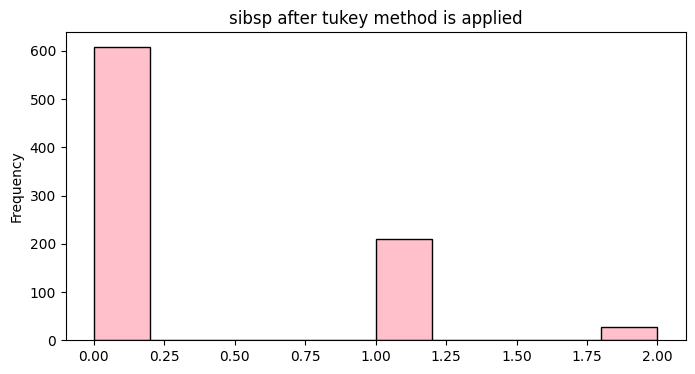

In [ ]:
df['sibsp'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='sibsp after tukey method is applied'); # visualizing 'sibsp' column histogram after tukey method is applied

In [ ]:
# Applying min max scaler in 'sibsp' column to scale

max_sibsp = df['sibsp'].max()
min_sibsp = df['sibsp'].min()


df['sibsp_scaled'] = (df['sibsp'] - min_sibsp) / (max_sibsp - min_sibsp)

df = df.drop(columns='sibsp')

In [ ]:
df.head()

,survived,parch,fare,embarked,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled
0,0,0,7.2500,S,False,True,True,0.271174,0.5
1,1,0,71.2833,C,False,False,False,0.472229,0.5
2,1,0,7.9250,S,False,True,False,0.321438,0.0
3,1,0,53.1000,S,False,False,False,0.434531,0.5
4,0,0,8.0500,S,False,True,True,0.434531,0.0


In [ ]:
df['parch'].unique() # exploring values of 'parch' column

array([0, 2, 1, 5, 3, 4, 6])

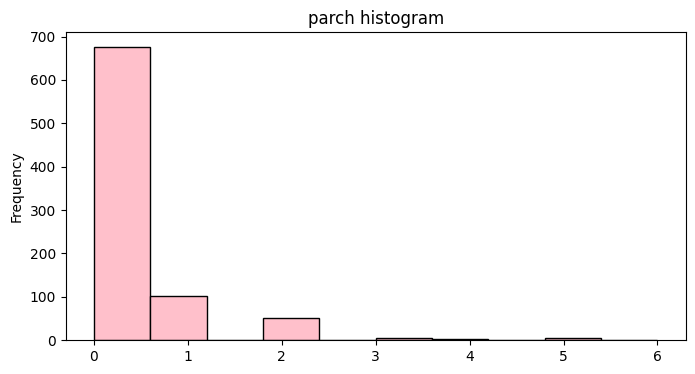

In [ ]:
df['parch'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='parch histogram'); # visualizing if there's any outlier in parch column

In [ ]:
df.loc[df['parch'] > 3] # visualizing higher values than 3 in 'parch' column

,survived,parch,fare,embarked,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled
13,0,5,31.2750,S,False,True,True,0.484795,0.5
25,1,5,31.3875,S,False,True,False,0.472229,0.5
167,0,4,27.9000,S,False,True,False,0.560191,0.5
360,0,4,27.9000,S,False,True,True,0.497361,0.5
438,0,4,263.0000,S,False,False,True,0.798944,0.5
567,0,4,21.0750,S,False,True,False,0.359135,0.0
610,0,5,31.2750,S,False,True,False,0.484795,0.5
638,0,5,39.6875,S,False,True,False,0.509927,0.0
678,0,6,46.9000,S,False,True,False,0.535059,0.5
885,0,5,29.1250,Q,False,True,False,0.484795,0.0


In [ ]:
df = df.query('parch not in [3, 4, 5, 6]') # dropping higher values than 3 in 'parch' column

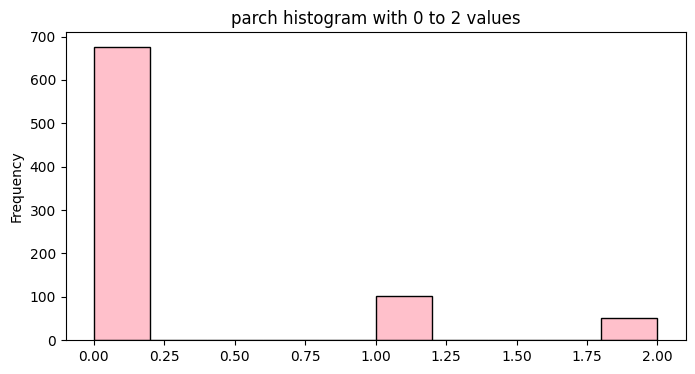

In [ ]:
df['parch'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='parch histogram with 0 to 2 values'); # visualizing parch column after dropping higher values than 3 in 'parch' column

In [ ]:
# Applying min max scaler in 'parch' column to scale

max_parch = df['parch'].max()
min_parch = df['parch'].min()


df['parch_scaled'] = (df['parch'] - min_parch) / (max_parch - min_parch)

df = df.drop(columns='parch')

In [ ]:
df.head()

,survived,fare,embarked,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled,parch_scaled
0,0,7.2500,S,False,True,True,0.271174,0.5,0.0
1,1,71.2833,C,False,False,False,0.472229,0.5,0.0
2,1,7.9250,S,False,True,False,0.321438,0.0,0.0
3,1,53.1000,S,False,False,False,0.434531,0.5,0.0
4,0,8.0500,S,False,True,True,0.434531,0.0,0.0


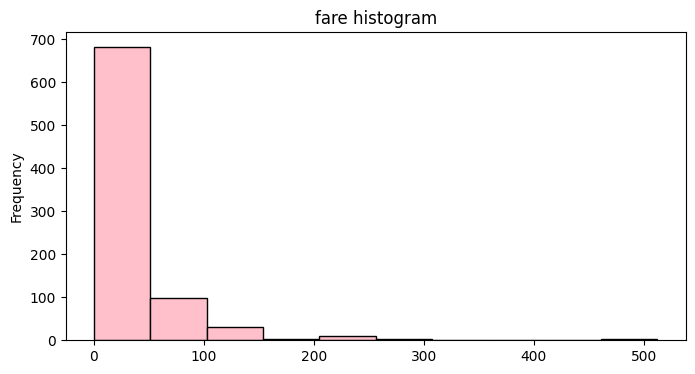

In [ ]:
df['fare'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='fare histogram'); # visualizing if there's any outlier in fare column

In [ ]:
df.loc[df['fare'] > 200] # visualizing higher values than 200 in 'fare' column

,survived,fare,embarked,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled,parch_scaled
118,0,247.5208,C,False,False,True,0.296306,0.0,0.5
258,1,512.3292,C,False,False,False,0.434531,0.0,0.0
299,1,247.5208,C,False,False,False,0.623021,0.0,0.5
311,1,262.3750,C,False,False,False,0.220910,1.0,1.0
377,0,211.5000,C,False,False,True,0.334004,0.0,1.0
380,1,227.5250,C,False,False,False,0.522493,0.0,0.0
527,0,221.7792,S,False,False,True,0.367921,0.0,0.0
557,0,227.5250,C,False,False,True,0.367921,0.0,0.0
679,1,512.3292,C,False,False,True,0.447097,0.0,0.5
689,1,211.3375,S,False,False,False,0.183212,0.0,0.5


In [ ]:
# quantile calculation of 'fare' column
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)

# Interquartile range calculation
iqr = q3 - q1
iqr

# minimum and maximum definition
tukey_min = q1 - 1.5 * iqr
tukey_max = q3 + 1.5 * iqr

tukey_min, tukey_max

# mask definition to erase outliers
tukey_mask = (df['fare'] > tukey_min) & (df['fare'] < tukey_max)
df = df[tukey_mask]

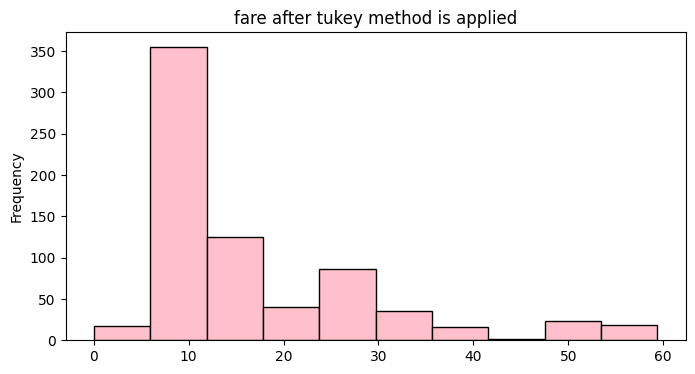

In [ ]:
df['fare'].plot(kind='hist', color='pink', edgecolor='k', figsize=(8, 4), title='fare after tukey method is applied'); # visualizing 'fare' column histogram after tukey method is applied

In [ ]:
# Applying min max scaler in 'fare' column to scale

max_fare = df['fare'].max()
min_fare = df['fare'].min()


df['fare_scaled'] = (df['fare'] - min_fare) / (max_fare - min_fare)

df = df.drop(columns='fare')

In [ ]:
df.head()

,survived,embarked,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled,parch_scaled,fare_scaled
0,0,S,False,True,True,0.271174,0.5,0.0,0.122054
2,1,S,False,True,False,0.321438,0.0,0.0,0.133418
3,1,S,False,False,False,0.434531,0.5,0.0,0.893939
4,0,S,False,True,True,0.434531,0.0,0.0,0.135522
5,0,Q,False,True,True,0.367921,0.0,0.0,0.142396


In [ ]:
df['embarked'].unique() # exploring values of 'embarked' column

array(['S', 'Q', 'C'], dtype=object)

In [ ]:
mode = df['embarked'].mode()[0] # imputation of null values with teh mode in 'embarked' column
df['embarked'] = df['embarked'].fillna(mode)

In [ ]:
df = pd.get_dummies(data=df, columns=['embarked'], drop_first=True, dtype='bool') # applying OHE on 'embarked' column

df.sample(7)

,survived,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled,parch_scaled,fare_scaled,embarked_Q,embarked_S
889,1,False,False,True,0.321438,0.0,0.0,0.505051,False,False
597,0,False,True,True,0.610455,0.0,0.0,0.000000,False,True
511,0,False,True,True,0.367921,0.0,0.0,0.135522,False,True
147,0,False,True,False,0.107816,1.0,1.0,0.578704,False,True
14,0,False,True,False,0.170646,0.0,0.0,0.132226,False,True
560,0,False,True,True,0.367921,0.0,0.0,0.130471,True,False
552,0,False,True,True,0.367921,0.0,0.0,0.131805,True,False


# Modeling

In [ ]:
df_X = df.drop(columns=['survived']) # defining model parameters
df_y = df['survived'] # defining the label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [ ]:
# importing random forest model
random_forest = RandomForestClassifier()

In [ ]:
# generating dictionary with posible values
param_grid = {
    'n_estimators': [80, 100, 120],
    'max_depth': [7, 10, 15],
    'min_samples_split': [2, 5, 7],
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train) # training the model

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [80, 100, 120]},
             verbose=2)

In [ ]:
# asking the gridsearch for the best parameters
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'max_depth': 7, 'min_samples_split': 7, 'n_estimators': 100}


In [ ]:
# model evaluation
y_predict = grid_search.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.83      0.67      0.74        86

    accuracy                           0.81       216
   macro avg       0.82      0.79      0.80       216
weighted avg       0.82      0.81      0.81       216



In [ ]:
# generating dictionary with posible values
param_grid_v2 = {
    'n_estimators': [80, 100, 120],
    'max_depth': [None],
    'min_samples_split': [2, 5, 7],
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train) # training the model

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [80, 100, 120]},
             verbose=2)

In [ ]:
random_forest_top = grid_search.best_estimator_

In [ ]:
random_forest_top

RandomForestClassifier(max_depth=7, min_samples_split=7, n_estimators=120)

In [ ]:
# model evaluation
y_predict = grid_search.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.82      0.69      0.75        86

    accuracy                           0.81       216
   macro avg       0.82      0.79      0.80       216
weighted avg       0.82      0.81      0.81       216



In [ ]:
# importing decission tree model v1
decision_tree_v1 = DecisionTreeClassifier(max_depth=2)

In [ ]:
decision_tree_v1.fit(X_train, y_train) # training the model on its v1 parameters

DecisionTreeClassifier(max_depth=2)

In [ ]:
decision_tree_v1.score(X_test, y_test) # calculating the score of the model

0.8009259259259259

In [ ]:
# importing model with depth=None as v2
decision_tree_v2 = DecisionTreeClassifier(max_depth=None)

In [ ]:
decision_tree_v2.fit(X_train, y_train) # training the model v2

DecisionTreeClassifier()

In [ ]:
decision_tree_v2.score(X_test, y_test) # calculating the score of the model v2

0.8055555555555556

In [ ]:
test_to_submit = pd.read_csv('/content/test_preprocessed.csv', index_col=[0])

In [ ]:
test_to_submit

,pclass_2,pclass_3,gender_male,age_scaled,sibsp_scaled,parch_scaled,fare_scaled,embarked_Q,embarked_S
0,False,True,True,0.452723,0.0,0.000000,0.127555,True,False
1,False,True,False,0.617566,0.5,0.000000,0.114045,False,True
2,True,False,True,0.815377,0.0,0.000000,0.157830,True,False
3,False,True,True,0.353818,0.0,0.000000,0.141131,False,True
4,False,True,False,0.287881,0.5,0.111111,0.200190,False,True
...,...,...,...,...,...,...,...,...,...
412,False,True,False,0.367005,0.0,0.000000,0.126672,False,True
413,False,True,True,0.396975,0.0,0.000000,0.131152,False,True
415,False,True,True,0.505473,0.0,0.000000,0.118118,False,True
416,False,True,True,0.396975,0.0,0.000000,0.131152,False,True


In [ ]:
test_to_submit['Survived'] = random_forest_top.predict(test_to_submit)

In [ ]:
test_to_submit['Survived']

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
412,0
413,0
415,0
416,0
